In [31]:
import os
import itertools
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size": 9})

In [2]:
################################################################################
def print_job(
    alpha, criterion, delta, deltaS, epochs, experiments_directory, lr,
    N_train, N_test, N_val, pooling, save, seed, use_pos_embedding, weight_decay
):
    model_name = f"alpha={alpha}_criterion={criterion}_delta={delta}_deltaS={deltaS}_lr={lr}_N_train={N_train}_pooling={pooling}_seed={seed}_use_pos_embedding={use_pos_embedding}"
    
    if os.path.exists(f'{experiments_directory}/{model_name}.csv'):
        temp_df = pd.read_csv(f'{experiments_directory}/{model_name}.csv')
        if temp_df.shape[0] == epochs:
            return
    
    command = (
        f"python ../src/toy_data.py "
        f"--alpha={alpha} "
        f"--batch_size={batch_size} "
        f"--criterion='{criterion}' "
        f"--delta={delta} "
        f"--deltaS={deltaS} "
        f"--epochs={epochs} "
        f"--experiments_directory='{experiments_directory}' "
        f"--lr={lr} "
        f"--model_name='{model_name}' "
        f"--N_test={N_test} "
        f"--N_train={N_train} "
        f"--N_val={N_val} "
        f"--pooling='{pooling}' "
        f"{'--save' if save else ''} "
        f"--seed={seed} "
        f"{'--use_pos_embedding' if use_pos_embedding else ''} "
        f"--weight_decay={weight_decay}"
    )
    
    print(f'    "{command}"')

In [45]:
# Varying delta
alphas = [1.0, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 0.0]
batch_size = 64
#criterions = ['L1', 'L2']
criterions = ['L1']
deltas = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
deltaS = 3
epochs = 1000
experiments_directory = '/cluster/tufts/hugheslab/eharve06/pooling/experiments/toy_data' 
lrs = [0.1, 0.01, 0.001, 0.0001]
N_train = 500
N_test = 100
N_val = 100
#poolings = ['max', 'mean', 'attention']
poolings = ['mean']
save = True
seeds = [1001]
use_pos_embedding = True
weight_decay = 0.0

for alpha, criterion, delta, lr, pooling, seed in itertools.product(alphas, criterions, deltas, lrs, poolings, seeds):
    print_job(alpha, criterion, delta, deltaS, epochs, experiments_directory, 
              lr, N_train, N_test, N_val, pooling, save, seed, 
              use_pos_embedding, weight_decay)

    "python ../src/toy_data.py --alpha=1.0 --batch_size=64 --criterion='L1' --delta=0.5 --deltaS=3 --epochs=1000 --experiments_directory='/cluster/tufts/hugheslab/eharve06/pooling/experiments/toy_data' --lr=0.1 --model_name='alpha=1.0_criterion=L1_delta=0.5_deltaS=3_lr=0.1_N_train=500_pooling=mean_seed=1001_use_pos_embedding=True' --N_test=100 --N_train=500 --N_val=100 --pooling='mean' --save --seed=1001 --use_pos_embedding --weight_decay=0.0"
    "python ../src/toy_data.py --alpha=1.0 --batch_size=64 --criterion='L1' --delta=0.5 --deltaS=3 --epochs=1000 --experiments_directory='/cluster/tufts/hugheslab/eharve06/pooling/experiments/toy_data' --lr=0.01 --model_name='alpha=1.0_criterion=L1_delta=0.5_deltaS=3_lr=0.01_N_train=500_pooling=mean_seed=1001_use_pos_embedding=True' --N_test=100 --N_train=500 --N_val=100 --pooling='mean' --save --seed=1001 --use_pos_embedding --weight_decay=0.0"
    "python ../src/toy_data.py --alpha=1.0 --batch_size=64 --criterion='L1' --delta=0.5 --deltaS=3 --e

In [39]:
# Varying delta
alphas = [1.0, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 0.0]
batch_size = 64
#criterions = ['L1', 'L2']
criterions = ['L1']
deltas = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
deltaS = 3
epochs = 1000
experiments_directory = '/cluster/tufts/hugheslab/eharve06/pooling/experiments/toy_data' 
lrs = [0.1, 0.01, 0.001, 0.0001]
N_train = 500
N_test = 100
N_val = 100
#poolings = ['max', 'mean', 'attention']
poolings = ['attention']
save = True
seeds = [1001]
use_pos_embedding = True
weight_decay = 0.0

columns = ['model_name', 'delta', 'seed', 'test_acc', 'test_auroc', 'test_auprc', 'test_loss', 'test_nll', 'train_acc', 'train_auroc', 'train_auprc', 'train_loss', 'train_nll', 'val_acc', 'val_auroc', 'val_auprc', 'val_loss', 'val_nll']
df = pd.DataFrame(columns=columns)

for alpha, criterion, delta, lr, pooling, seed in itertools.product(alphas, criterions, deltas, lrs, poolings, seeds):
    model_name = f"alpha={alpha}_criterion={criterion}_delta={delta}_deltaS={deltaS}_lr={lr}_N_train={N_train}_pooling={pooling}_seed={seed}_use_pos_embedding={use_pos_embedding}"
    
    if os.path.exists(f'{experiments_directory}/{model_name}.csv'):
        temp_df = pd.read_csv(f'{experiments_directory}/{model_name}.csv')
        index = temp_df.val_auroc.idxmax()
        row = [model_name, delta, seed, temp_df.test_acc.values[index], temp_df.test_auroc.values[index], temp_df.test_auprc.values[index], temp_df.test_loss.values[index], temp_df.test_nll.values[index], temp_df.train_acc.values[index], temp_df.train_auroc.values[index], temp_df.train_auprc.values[index], temp_df.train_loss.values[index], temp_df.train_nll.values[index], temp_df.val_acc.values[index], temp_df.val_auroc.values[index], temp_df.val_auprc.values[index], temp_df.val_loss.values[index], temp_df.val_nll.values[index]]
        df.loc[len(df)] = row

In [40]:
indices = df.groupby(['delta', 'seed'])['val_auroc'].idxmax()
df = df.loc[indices].reset_index(drop=True)
df

,model_name,delta,seed,test_acc,test_auroc,test_auprc,test_loss,test_nll,train_acc,train_auroc,train_auprc,train_loss,train_nll,val_acc,val_auroc,val_auprc,val_loss,val_nll
0,alpha=1.0_criterion=L1_delta=0.5_deltaS=3_lr=0...,0.5,1001,0.50,0.468283,0.559719,2.649888,0.693842,0.486,0.485336,0.486871,2.649616,0.693570,0.70,0.745833,0.684357,2.644472,0.688426
1,alpha=1.0_criterion=L1_delta=1.0_deltaS=3_lr=0...,1.0,1001,0.42,0.522222,0.585998,0.713651,0.693139,0.512,0.516072,0.517446,0.713655,0.693143,0.68,0.743333,0.710741,0.713599,0.693087
2,alpha=0.01_criterion=L1_delta=1.5_deltaS=3_lr=...,1.5,1001,0.53,0.603636,0.652872,2.316878,1.901316,0.992,0.999760,0.999763,0.451679,0.036116,0.75,0.793333,0.792728,1.272377,0.856815
3,alpha=0.01_criterion=L1_delta=2.0_deltaS=3_lr=...,2.0,1001,0.69,0.784243,0.803874,1.520009,1.205072,0.994,0.999824,0.999821,0.340245,0.025307,0.85,0.941250,0.921597,0.693184,0.378247
4,alpha=0.01_criterion=L1_delta=2.5_deltaS=3_lr=...,2.5,1001,0.82,0.910303,0.928316,0.826477,0.543953,0.966,0.999728,0.999736,0.355918,0.073393,0.84,0.983333,0.978429,0.703412,0.420887
5,alpha=0.01_criterion=L1_delta=3.0_deltaS=3_lr=...,3.0,1001,0.89,0.972525,0.978598,0.438972,0.246229,0.998,1.000000,1.000000,0.205077,0.012334,0.96,0.999167,0.998810,0.271622,0.078879
6,alpha=0.01_criterion=L1_delta=3.5_deltaS=3_lr=...,3.5,1001,0.97,0.995556,0.996970,0.250854,0.081327,1.000,1.000000,1.000000,0.182541,0.013014,1.00,1.000000,1.000000,0.205554,0.036027
7,alpha=0.1_criterion=L1_delta=4.0_deltaS=3_lr=0...,4.0,1001,0.99,1.000000,1.000000,0.699157,0.128934,0.998,1.000000,1.000000,0.683538,0.113316,1.00,1.000000,1.000000,0.686930,0.116708
8,alpha=0.1_criterion=L1_delta=4.5_deltaS=3_lr=0...,4.5,1001,1.00,1.000000,1.000000,0.665068,0.110848,1.000,1.000000,1.000000,0.655734,0.101514,1.00,1.000000,1.000000,0.660940,0.106720
9,alpha=0.01_criterion=L1_delta=5.0_deltaS=3_lr=...,5.0,1001,1.00,1.000000,1.000000,0.103325,0.018268,1.000,1.000000,1.000000,0.101093,0.016036,1.00,1.000000,1.000000,0.103162,0.018105


In [41]:
df.test_auroc.values

array([0.46828282, 0.52222222, 0.60363638, 0.78424251, 0.910303  ,
       0.97252536, 0.99555558, 0.99999994, 0.99999994, 0.99999994])

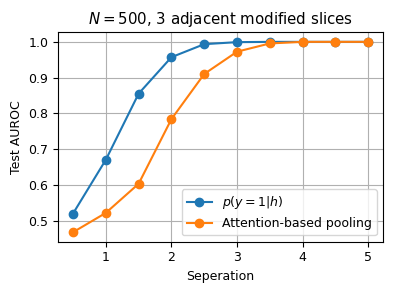

In [37]:
# L1
deltas = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
bayes_aurocs = [0.520404040813446, 0.670707106590271, 0.8553534746170044, 0.9571717977523804, 0.9935353994369507, 0.9991918802261353, 0.9999999403953552, 1.0, 1.0, 1.0]
attention_aurocs = [0.46828282, 0.52222222, 0.60363638, 0.78424251, 0.910303, 0.97252536, 0.99555558, 0.99999994, 0.99999994, 0.99999994]

ncols, nrows = 1, 1

fig, ax = plt.subplots(figsize=(4*ncols, 3*nrows), ncols=ncols, nrows=nrows, sharey=True)

ax.plot(deltas, bayes_aurocs, label=r"$p(y=1|h)$", marker="o")
#ax.plot(deltas, max_aurocs, label="Max pooling", marker="o")
#ax.plot(deltas, mean_aurocs, label="Mean pooling", marker="o")
ax.plot(deltas, attention_aurocs, label="Attention-based pooling", marker="o")
ax.set_xlabel("Seperation")
ax.grid()

ax.set_title(r"$N=500$, 3 adjacent modified slices")
ax.set_ylabel("Test AUROC")
ax.legend(loc="lower right")

fig.tight_layout()
#fig.savefig("handcrafted_weights.pdf", bbox_inches="tight")
plt.show()